In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [2]:
# csv를 가져와 넘파이배열 형태의 데이터셋으로 가공하는 과정
import csv
f1=open('winequality-red.csv','r',encoding='UTF-8')
f2=open('winequality-white.csv','r',encoding='UTF-8')
red_wine_data = csv.reader(f1)
white_wine_data = csv.reader(f2)
raw1=[]# 가공 전 레드와인 데이터를 넣어둘 리스트
raw2=[]# 가공 전 화이트와인 데이터를 넣어둘 리스트

total_data=[]# 가공된 모든 와인 데이터를 넣어둘 리스트

features=[]# 특성 이름을 모아둘 리스트
feat=[]# csv에 "특성이름" 의 형태로 들어가 있어서 ""을 제거하기 전 특성 이름 리스트
target=[]# 정답인 등급을 모아둘 리스트

for r in red_wine_data:
    r=r[0].split(';')
    r.insert(0,'1')#red가 1
    raw1.append(r)

for w in white_wine_data:
    w=w[0].split(';')
    w.insert(0,'0')#white가 0
    raw2.append(w)

raw1[0].pop(0)# 와인의 색 정보로 위에서 넣어둔 1을 빼냄
feat=raw1[0]
for f in feat:
    s=f[1:len(f)-1]# ""을 제거하는 부분
    features.append(s)
features.insert(0,'color')

# csv의 첫번째 행이 특성 정보이므로 그것을 없애는 작업
raw1.pop(0)
raw2.pop(0)

for i1 in raw1:
    total_data.append(i1)

for i2 in raw2:
    total_data.append(i2)

for t in total_data:
    target.append(t.pop())


total_data=np.array(total_data)
total_data = total_data.astype(np.float64)# 실행했을때 밑의 경고문이 떠서 추가
"""
FutureWarning:
Beginning in version 0.22,
arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'.
It is recommended that you convert the array to a float dtype before using it in scikit-learn
"""

import copy

target_5=copy.deepcopy(target) # 1~4 / 5~10
target_6=copy.deepcopy(target) # 1~5 / 6~10
target_7=copy.deepcopy(target) # 1~6 / 7~10

for i in range(0,len(target_5)):
    if int(target_5[i])<5:
        target_5[i]='0'
    else:
       target_5[i]='1'
        
for i in range(0,len(target_6)):
    if int(target_6[i])<5:
        target_6[i]='0'
    else:
       target_6[i]='1'
        
for i in range(0,len(target_7)):
    if int(target_7[i])<5:
        target_7[i]='0'
    else:
       target_7[i]='1'
        
target_5=np.array(target_5)
target_5 = target_5.astype(np.float64)
target_6=np.array(target_6)
target_6 = target_6.astype(np.float64)
target_7=np.array(target_7)
target_7 = target_7.astype(np.float64)

f1.close()
f2.close()

#위에서 copy가 일어나므로 밑에서 처리
target=np.array(target)
target = target.astype(np.float64)

In [4]:
# 훈련 데이터와 테스트 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(total_data, target, random_state=0)

# KNeighborsClassifier n_neighbors 조정, weights = uniform

In [5]:
def knn_by_n(n,x,y,test,pred):
    #매개변수는 순서대로 k, 훈련데이터 특성배열, 훈련데이터 타겟배열, 테스트셋 특성배열, 테스트셋 타겟배열
    knn=KNeighborsClassifier(n_neighbors=n)#k=n인 knn
    knn.fit(x, y)
    y_pred = knn.predict(test)
    if n%50==0:
        print(n)
    #print("n = ", n)
    #print("k="+str(n)+"테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred==y_test)))
    return np.mean(y_pred==pred)# 테스트셋의 정확도를 반환

In [6]:
knn_uni=[]# 반환된 정확도를 모아둘 배열
for i in range(1,150):
    #최대 k = 1625
    knn_uni.append(knn_by_n(i,x_train,y_train,x_test,y_test))
best=float(knn_uni[0])
for i in knn_uni:
    if i>best:
        best=i
print("n_neighbors가 " + str(knn_uni.index(best)+1) + "일때 정확도 " + str(best) + "가 최대")

50
100
n_neighbors가 1일때 정확도 0.5784615384615385가 최대


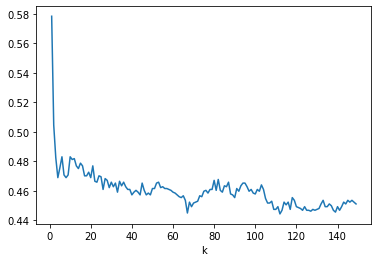

In [15]:
data = [("k","정확도")]
for i in range(0,149):
    data.append((i+1,knn_uni[i]))

df=pd.DataFrame(data, columns=["k","정확도"])
df1=df.drop(0)
df2=df1.set_index("k")
s = df2["정확도"]
ax = s.plot()

# KNeighborsClassifier n_neighbors 조정, weights = distance|

In [7]:
def knn_by_n_d(n,x,y,test,pred):
    #매개변수는 순서대로 k, 훈련데이터 특성배열, 훈련데이터 타겟배열, 테스트셋 특성배열, 테스트셋 타겟배열
    knn=KNeighborsClassifier(n_neighbors=n, weights='distance')#k=n인 knn
    knn.fit(x, y)
    y_pred = knn.predict(test)
    if n%50==0:
        print(n)
    #print("n = ", n)
    #print("k="+str(n)+"테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred==y_test)))
    return np.mean(y_pred==pred)# 테스트셋의 정확도를 반환

In [8]:
knn_dis=[]# 반환된 정확도를 모아둘 배열
for i in range(1,150):
    #최대 k = 1625
    knn_dis.append(knn_by_n_d(i,x_train,y_train,x_test,y_test))
best=float(knn_dis[0])
for i in knn_dis:
    if i>best:
        best=i
print("n_neighbors가 " + str(knn_dis.index(best)+1) + "일때 정확도 " + str(best) + "가 최대")

50
100
n_neighbors가 132일때 정확도 0.6153846153846154가 최대


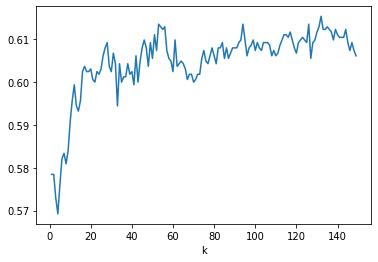

In [16]:
data = [("k","정확도")]
for i in range(0,149):
    data.append((i+1,knn_dis[i]))

df=pd.DataFrame(data, columns=["k","정확도"])
df1=df.drop(0)
df2=df1.set_index("k")
s = df2["정확도"]
ax = s.plot()

# KNeighborsRegressor n_neighbors 조정, weights = uniform

In [9]:
def reg_by_n(n,x,y,test,pred):
    #매개변수는 순서대로 k, 훈련데이터 특성배열, 훈련데이터 타겟배열, 테스트셋 특성배열, 테스트셋 타겟배열
    reg=KNeighborsRegressor(n_neighbors=n)#k=n인 knn
    reg.fit(x, y)
    if n%50==0:
        print(n)
    #print("n = ", n)
    #print("테스트 세트 예측:\n{}".format(reg.predict(test)))
    #print("테스트 세트 R^2: {:.2f}".format(reg.score(test, pred)))
    return reg.score(test, pred)

In [10]:
reg_uni=[]# 반환된 정확도를 모아둘 배열
for i in range(1,150):
    #최대 k = 1625
    reg_uni.append(reg_by_n(i,x_train,y_train,x_test,y_test))
best=float(reg_uni[0])
for i in reg_uni:
    if i>best:
        best=i
print("n_neighbors가 " + str(reg_uni.index(best)+1) + "일때 정확도 " + str(best) + "가 최대")

100
n_neighbors가 15일때 정확도 0.1700872199607657가 최대


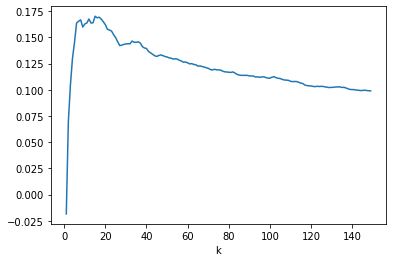

In [17]:
data = [("k","정확도")]
for i in range(0,149):
    data.append((i+1,reg_uni[i]))

df=pd.DataFrame(data, columns=["k","정확도"])
df1=df.drop(0)
df2=df1.set_index("k")
s = df2["정확도"]
ax = s.plot()

# KNeighborsRegressor n_neighbors 조정, weights = distance

In [11]:
def reg_by_n_d(n,x,y,test,pred):
    #매개변수는 순서대로 k, 훈련데이터 특성배열, 훈련데이터 타겟배열, 테스트셋 특성배열, 테스트셋 타겟배열
    reg=KNeighborsRegressor(n_neighbors=n, weights='distance')#k=n인 knn
    reg.fit(x, y)
    if n%50==0:
        print(n)
    #print("n = ", n)
    #print("테스트 세트 예측:\n{}".format(reg.predict(test)))
    #print("테스트 세트 R^2: {:.2f}".format(reg.score(test, pred)))
    return reg.score(test, pred)

In [12]:
reg_dis=[]# 반환된 정확도를 모아둘 배열
for i in range(1,150):
    #최대 k = 1625
    reg_dis.append(reg_by_n_d(i,x_train,y_train,x_test,y_test))
best=float(reg_dis[0])
for i in reg_dis:
    if i>best:
        best=i
print("n_neighbors가 " + str(reg_dis.index(best)+1) + "일때 정확도 " + str(best) + "가 최대")

50
100
n_neighbors가 37일때 정확도 0.35480010116589333가 최대


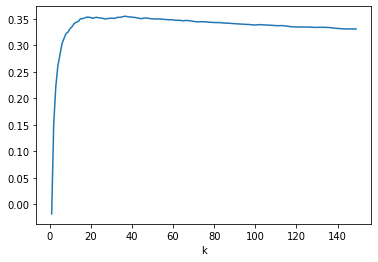

In [18]:
data = [("k","정확도")]
for i in range(0,149):
    data.append((i+1,reg_dis[i]))

df=pd.DataFrame(data, columns=["k","정확도"])
df1=df.drop(0)
df2=df1.set_index("k")
s = df2["정확도"]
ax = s.plot()

# 방법별 최대 정확도

In [21]:
knn_u=KNeighborsClassifier(n_neighbors=1)
knn_u.fit(x_train,y_train)
knn_u_pred = knn_u.predict(x_test)
print("k=1 테스트 세트의 정확도: {:.2f}".format(np.mean(knn_u_pred==y_test)))

knn_d=KNeighborsClassifier(n_neighbors=132, weights='distance')
knn_d.fit(x_train,y_train)
knn_d_pred = knn_d.predict(x_test)
print("k=132 테스트 세트의 정확도: {:.2f}".format(np.mean(knn_d_pred==y_test)))

reg_u=KNeighborsRegressor(n_neighbors=15)
reg_u.fit(x_train,y_train)
#print("테스트 세트 예측:\n{}".format(reg.predict(test)))
print("k=15 테스트 세트 R^2: {:.2f}".format(reg_u.score(x_test, y_test)))
    
reg_d=KNeighborsRegressor(n_neighbors=37, weights='distance')
reg_d.fit(x_train,y_train)
#print("테스트 세트 예측:\n{}".format(reg.predict(test)))
print("k=37 테스트 세트 R^2: {:.2f}".format(reg_d.score(x_test, y_test)))

k=1 테스트 세트의 정확도: 0.58
k=132 테스트 세트의 정확도: 0.62
k=15 테스트 세트 R^2: 0.17
k=37 테스트 세트 R^2: 0.35


In [22]:
# 이진 분류
x_train, x_test, y_train, y_test = train_test_split(total_data, target_7, random_state=0)

In [24]:
knn_u=KNeighborsClassifier(n_neighbors=11)
knn_u.fit(x_train,y_train)
knn_u_pred = knn_u.predict(x_test)
print("k=11 테스트 세트의 정확도: {:.2f}".format(np.mean(knn_u_pred==y_test)))

knn_d=KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_d.fit(x_train,y_train)
knn_d_pred = knn_d.predict(x_test)
print("k=5 테스트 세트의 정확도: {:.2f}".format(np.mean(knn_d_pred==y_test)))

# 여긴 돌려봐야해

reg_d=KNeighborsRegressor(n_neighbors=22, weights='distance')
reg_d.fit(x_train,y_train)
#print("테스트 세트 예측:\n{}".format(reg.predict(test)))
print("k=22 테스트 세트 R^2: {:.2f}".format(reg_d.score(x_test, y_test)))

k=11 테스트 세트의 정확도: 0.96
k=5 테스트 세트의 정확도: 0.96
k=22 테스트 세트 R^2: 0.11
